# **Linear Regression**

## **0. Introduction**

In this note, we will review some basic concepts of linear regression.

I assume every audience is familiar with matrix algebra and basic econometrics.

- If not, Wooldridge's [Introductory econometrics](https://product.kyobobook.co.kr/detail/S000003938621) is one good option.

### **0.1. Expected Outcomes**

By studying this note, you will :

- understand the underlying idea of linear regression
- not be frightened by terminologies used in academic articles

### **0.2. References**

This note draws heavily from the following sources:

- Thomas J. Sargent and John Stachurski. (n.d.). Linear Regression in Python. Intermediate Quantitative Economics with Python. [link](https://python.quantecon.org/ols.html)
- Jaeho Kim. (2023). Financial Market Analysis. Sogang University.
- John Stachurski. (2016). A Primer in Econometric Theory. MIT Press. [link](https://johnstachurski.net/emet.html)

I would highly recommend checking them out if you are interested in learning more about this topic.

## **1. Linear Regression**

We start with the prediction problem - a system with vector input $X_n \in \mathbb{R}^k$ followed by scalar output $y_n$.

For example,

- $X_n$ is a description of a lottery (probabilities, possible outcomes, etc.) in a controlled experiment and $y_n$ is willingness to pay in order to participate.
- $X_n$ is a set of household characteristics (ethnicity, age, location, etc.) and $y_n$ is household wealth at some later date.
- $X_n$ is price of electricity, prices of alternatives, temperature, household income, and measurements of the regional income distribution, while $y_n$ is regional electricity consumption.

Suppose we have $N$ observations $Z_n := (X_n, y_n)$, all draws from fixed joint distribution $P$.

Since $P$ is fixed, we are assuming the system is stationary across the set of draws.

Our problem is that :

> We need to choose function $f: \mathbb{R}^k \rightarrow \mathbb{R}$ such that $f(X)$ is a good predictor of $y$.

### **1.1. The Best Predictor**

To define "good predictor" mathematically, we need a loss function.

Let $X \in \mathbb{R}^k$ be a  $k \times 1$ random vector and $Y \in \mathbb{R}$ be a random variable.

We will be using quadratic loss, thus minimize the prediction risk given by

$$R(f) := \mathbb{E}_{P}[(y - f(X))^2] \tag{1}$$.

Minimizer of (1) over the set of all $\mathcal{B}$-measurable functions is the regression function $f^{*}(X) := \mathbb{E}_{P}[y|X]$

Recall we cannot compute the regression function because $P$ is not known.

### **1.2. Review on CEF**

Concepts of **conditional expectation functions (CEF)** provides important facts when studying econometrics.

In this section, we review some properties of CEF.

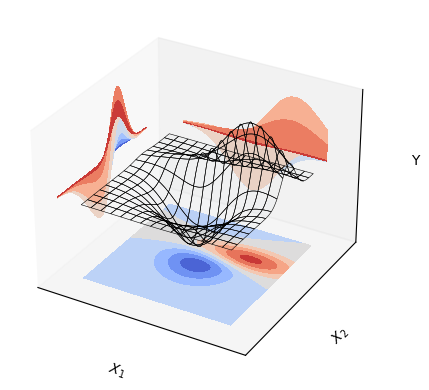

In [209]:
# You can ignore this block of codes. 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

ax.plot_surface(X, Y, Z, edgecolor='k', lw=0.4, rstride=8, cstride=8, alpha=0.01)

ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100), xlabel='$X_1$', ylabel='$X_2$', zlabel='Y')
ax.set_xticks([], visible=False)
ax.set_yticks([], visible=False)
ax.set_zticks([], visible=False)

plt.show()

### **1.3. Least Squares**

Instead we apply the principle of empirical risk minimization, which leads to the problem :

$$\min_{f \in \mathcal{H}} R_{emp}(f) \quad \text{where} \quad R_{emp}(f) := \frac{1}{N}\sum^{N}_{n=1} (y_n - f(X_n))^2 \tag{2}$$

Here $\mathcal{H}$ is the hypothesis space, a set of candidate functions mapping $\mathbb{R}^k$ into $\mathbb{R}$.

The problem (2) is called a **least squares** problem.

### **1.4. Linear Predictors**

Note that minimizing empirical risk is different from minimizing the prediction risk $R(f)$ - thus $\mathcal{H}$ must be restricted.

Consider the case $\mathcal{H} = \mathcal{H}_l$, where $\mathcal{H}_l$ is all linear functions from $\mathbb{R}^k$ to $\mathbb{R}$.

Then we can write

$$\mathcal{H}_l = \{ \text{all } f: \mathcal{R}^k \rightarrow \mathcal{R} \text{ such that } f(X) = X^{T}\mathbf{b} \text{ for some } \mathbf{b} \in \mathbb{R}^k  \}$$

Then problem (2) reduces to 

$$\min_{\mathbf{b} \in \mathcal{R}^k} \sum^{N}_{n=1} (y_n - X_n^{T}\mathbf{b})^2 \tag{3}$$

The intuition of the problem is that **the line of best fit** to minimize in-sample prediction error.

Good reasons to start with $\mathcal{H}_l$, even where no linearity assumptions are imposed :

- $\mathcal{H}_l$ is a natural starting point when seeking a class of simple, well-behaved functions
- setting $\mathcal{H} = \mathcal{H}_l$ allows us to obtain analytical expression for the minimizer, which simplifies both analysis and computation
- the technique has an extension from $\mathcal{H}_l$ to broader classes of functions.

Solving (3), we get the solution $\hat{\beta}$ :

$$\hat{\beta} := (X^{T}X)^{-1}X^{T}y \tag{4}$$

Traditionally, $\hat{\beta}$ is called the **least squares estimator**.

Once we move to more classical assumptions, it will be an estimator of a particular parameter vector.

At this stage it just defines our answer to the problem posed in (3), i.e.,

$$\text{given } X \in \mathbb{R}^k, \text{ our prediction of } y \text{ is } f(X) = X^{T}\hat{\beta}$$

### **1.5. Interpretation of $\beta$**

Here, we review how to interpret $\beta$.

## **2. Regression in Python**

Linear regression is a standard tool for analyzing the relationship between two or more variables.

In this section, we'll use the Python package `statsmodels` to estimate, interpret, and visualize linear regression models.

Along the way, we'll discuss a variety of topics, including

- simple and multivariate linear regression
- visualization
- heteroskedasticity
- endogeneity and omitted variable bias
- two-stage least squares.

Despite the theoretical complexity, its application is remarkably straightforward.

Thus, to avoid being overwhelmed by mathematical rigor, let's start by learning how to use them in Python.

- Unfortunately, there will be no time to go through math-oriented concepts in this semester.
- Please refer to this awesome [textbook](https://johnstachurski.net/emet) by John Stachurski if you are interested in such concepts.

We first start with importing necessary packages.

In [1]:
# [Description] Import necessary packages.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

As an example, we will replicate results from Acemoglu, Johnson and Robinson's seminal paper. ([download link](https://economics.mit.edu/sites/default/files/publications/colonial-origins-of-comparative-development.pdf))

> In the paper, the authors emphasize the importance of institutions in economic development. <br>
> The main contribution is the use of settler mortality rates as a source of exogeneous variation in institutional differences. <br>
> Such variation is needed to determine whether it is institutions that give rise to greater economic growth, rather than the other way around.

### **2.1. Simple Linear Regression**

(Acemoglu et al., 2001) wish to determine whether or not differences in institutions can help explain observed economic outcomes.

How do we measure *institutional differences* and *economic outcomes*?

In this paper,

- economic outcomes are proxied by log GDP per capita in 1995, adjusted for exchange rates.
- institutional differences are proxied by and index of protection against expropritation on average 1985-1995, constructed by the Political Risk Services Group.

These variables and other data used in the paper are available for download on Daron Acemoglu’s [webpage](https://economics.mit.edu/people/faculty/daron-acemoglu/data-archive).

We will use pandas’ `.read_stata()` function to read in data contained in the `.dta` files to dataframes.

In [2]:
df1 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable1.dta?raw=true')

df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's use a scatterplot to see whether any obvious relationship exists between GDP per capita and the protection against expropriation index.

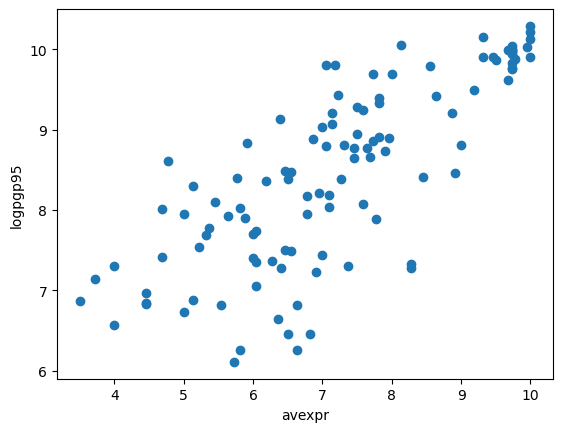

In [7]:
plt.scatter(x='avexpr', y='logpgp95', data=df1)

plt.xlabel('avexpr')
plt.ylabel('logpgp95')

plt.show()

The plot shows a fairly strong positive relationship between protection against expropriation and log GDP per capita.

Specifically, if higher protection against expropritation is a measure of institutional quality, then better institutions appear to be positively correlated with better economic outcomes (higher GDP per capita).

Given the plot, choosing a linear model to describe this relationship seems like a reasonable assumption.

We can write our model as 

$$logpgp95_{i} = \beta_0 + \beta_1 avexpr_{i} + u_{i}$$

where

- $\beta_0$ is the intercept of the linear trend line on the y-axis
- $\beta_1$ is the slope of the linear trend line, representing the *marginal effect* of protection against risk on log GDP per capita.
- $u_i$ is a random error term (deviations of observations from the linear trend due to factors not included in the model)

Visually, the linear model involves choosing a straight line that best fits the data, as in the following plot (Figure 2 in Acemoglu et al., 2001).

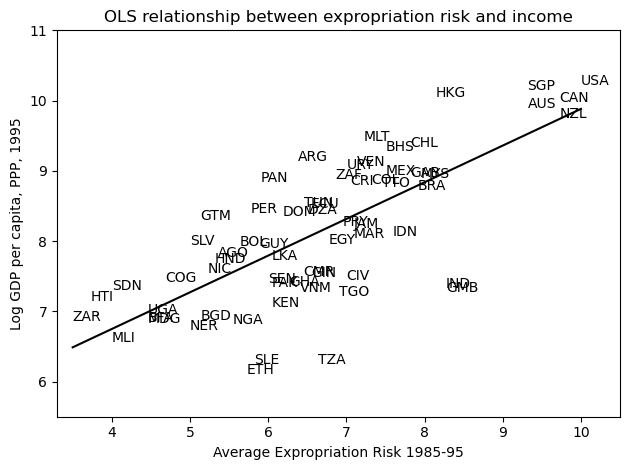

In [24]:
data = df1.dropna(subset=['logpgp95', 'avexpr']) # Dropping NaN's is required to use numpy's polyfit.
data = data.loc[data['baseco']==1, :] # Use only 'base sample' for plotting purposes.

X = data['avexpr']
y = data['logpgp95']
labels = data['shortnam']

fig, ax = plt.subplots()

ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i])) # Replace markers with country labels.

ax.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)), color='black') # Fit a linear trend line.

ax.set_xlim([3.3, 10.5])
ax.set_ylim([5.5, 11.0])
ax.set_xlabel('Average Expropriation Risk 1985-95')
ax.set_ylabel('Log GDP per capita, PPP, 1995')
ax.set_title('OLS relationship between expropriation risk and income')

fig.tight_layout()

The most common technique to estimate the parameters ($\beta$’s) of the linear model is **Ordinary Least Squares (OLS)**.

As the name implies, an OLS model is solved by finding the parameters that minimize the sum of squared residuals, i.e.

$$ \min_{\hat{\beta}} \sum\limits^{N}_{i=1} \hat{u}^{2}_{i} $$

where $\hat{u}_{i}$ is the difference between the observation and the predicted value of the dependent variable.

To estimate the constant term $\beta_0$, we need to add a column of 1's to our dataset (consider the equation if $\beta_0$ was replaced with $\beta_0 x_i$ and $x_i = 1$)

In [25]:
df1['const'] = 1

Now we can construct our model in `statsmodels` using the OLS function.

We will use `pandas` dataframes with `statsmodels`, however standard arrays can also be used as arguments

In [26]:
reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], missing='drop')

print(type(reg1))

<class 'statsmodels.regression.linear_model.OLS'>


So far we have simply constructed our model.

We need to use `.fit()` to obtain parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$.

In [28]:
res = reg1.fit()

print(type(res))

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


We now have the fitted regression model stored in `res`.

To view the OLS regression results, we can call the `.summary()` method.

Note that an observation was mistakenly dropped from the results in the original paper (see the note located in `maketable2.do` from Acemoglu’s webpage), and thus the coefficients differ slightly.

In [30]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           4.16e-24
Time:                        16:42:18   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

From our results, we see that

- The intercept $\hat{\beta}_0 = 4.63$
- The slope $\hat{\beta}_1 = 0.53$
- The positive $\hat{\beta}_1$ parameter estimate implies that 'institutional quality has a positive effect on economic outcomes', as we saw in the figure.
- The p-value of 0.000 for $\hat{\beta}_1$ implies that the effect of institutions on GDP is statistically significant (using p < 0.05) as a rejecttion rule).
- The R-squared value of 0.611 indicated that around 61% of variation in log GDP per capita is explained by protection against expropriation.

Using our parameter estimates, we can now write our estimated relationship as

$$\widehat{logpgp95}_i = 4.63 + 0.53 avexpr_i$$

This equation describes the line that best fits our data, as shown in Figure 2.

We can use this equation to predict the level of log GDP per capita for a value of the index of expropriation protection.

For example, for a country with an index value of 7.07 (the average for the dataset), we find that their predicted level of log GDP per capita in 1995 is 8.38.

In [31]:
mean_expr = np.mean(data['avexpr'])

print(mean_expr)

6.515625


In [32]:
predicted_logpdp95 = 4.63 + 0.53 * 7.07

predicted_logpdp95

8.3771

An easier (and more accurate) way to obtain this result is to use `.predict()` and set $constant = 1$ and $avexpr_i = mean\_expr$.

In [34]:
res.predict(exog=[1, mean_expr])

array([8.09156367])

We can obtain an array of predicted $logpgp95_i$ for every value of $avexpr_i$ in our dataset by calling `.predict()` on our results.

Plotting the predicted values against $avexpr_i$ shows that the predicted values lie along the linear line that we fitted above.

The observed values of $logpgp95_i$ are also plotted for comparison purposes

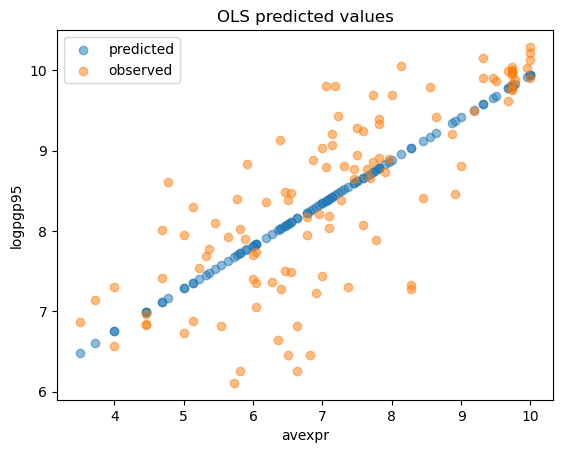

In [36]:
data = df1.dropna(subset=['logpgp95', 'avexpr'])

fix, ax = plt.subplots()

ax.scatter(data['avexpr'], res.predict(), alpha=0.5, label='predicted') # Plot predicted values
ax.scatter(data['avexpr'], data['logpgp95'], alpha=0.5, label='observed') # Plot observed values

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('avexpr')
ax.set_ylabel('logpgp95')

fig.tight_layout()

### **2.2. Extending the Linear Regression Model**

So far we have only accounted for institutions affecting economic performance - almost certainly there are numerous other factors affecting GDP that are not inluded in our model.

Leaving out variables that affect $logpgp95_i$ will result in **omitted variable bias**, yielding biased and inconsistent parameter estimates.

We can extend our bivariate regression model to a **multivariate regression model** by adding in other factors that may affect $logpgp95_i$.

(Acemoglu et al., 2001) consider other factors such as:

- the effect of climate on economic outcomes; latitude is used to proxy this
- differences that affect both economic performance and institutions, e.g., cultural, historical, etc.; controlled for with the use of continent dummies

Let's estimate some of the extended models considered in the paper (Table 2) using data from `maketable2.dta`.

In [37]:
df2 = df2 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable2.dta?raw=true')

# Add constant term to dataset
df2['const'] = 1

# Create lists of variables to be used in each regression
X1 = ['const', 'avexpr']
X2 = ['const', 'avexpr', 'lat_abst']
X3 = ['const', 'avexpr', 'lat_abst', 'asia', 'africa', 'other']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df2['logpgp95'], df2[X1], missing='drop').fit()
reg2 = sm.OLS(df2['logpgp95'], df2[X2], missing='drop').fit()
reg3 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit()

Now that we have fitted our model, we will use `summary_col` to display the results in a single table.

Model numbers correspond to those in the paper.

In [39]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1, reg2, reg3],
                            float_format='%0.2f',
                            stars=True,
                            model_names=['Model 1', 'Model 3', 'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const', 'avexpr', 'lat_abst', 'asia', 'africa'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

        Table 2 - OLS Regressions
                 Model 1 Model 3 Model 4 
-----------------------------------------
const            4.63*** 4.87*** 5.85*** 
                 (0.30)  (0.33)  (0.34)  
avexpr           0.53*** 0.46*** 0.39*** 
                 (0.04)  (0.06)  (0.05)  
lat_abst                 0.87*   0.33    
                         (0.49)  (0.45)  
asia                             -0.15   
                                 (0.15)  
africa                           -0.92***
                                 (0.17)  
other                            0.30    
                                 (0.37)  
R-squared        0.61    0.62    0.72    
R-squared Adj.   0.61    0.62    0.70    
R-squared        0.61    0.62    0.72    
No. observations 111     111     111     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### **2.3. Test under Multiple Restrictions**

The next exercise is to perform a statistical test with mutiple restrictions. 

Suppose that we want to test the cofficients for variables asia, africa,other are all zeros in model 4. 

How do we do it? 

The null hypothesis will be $H_0 : \beta_3=\beta_4=\beta_5=0$.

A simple way to carry out the test is to use a numpy array and command `f_test()`. 

See the example below.

In [46]:
test_r1 = np.array(([0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 1]))

print(reg3.f_test(test_r1))

<F test: F=11.393166935971335, p=1.5755249569430665e-06, df_denom=105, df_num=3>


In the above code, Python recognizes array `test_r1` in `f_test(test_r1)` as a set of restrictions used in a hypothesis test. 

- The first row of the array `[0 0 0 1 0 0]` brings $\beta_3$ and restricts it to be 0. 
- The second row of the array `[0 0 0 0 1 0]` brings $\beta_4$ and restricts it to be 0. 
- The third row of the array `[0 0 0 0 0 1]` brings $\beta_5$ and restricts it to be 0. 

So in total three restrictions are inserted into `f_test(test_r1)`. 

The computed F statistic is 11.39316694 and the corresponding p-value is 1.5755249569429032e-06 (that is, 0.000000157....). 

Because the p-value is so small, we should reject the null hypothesis $H_0 : \beta_3=\beta_4=\beta_5=0$.

We can try another example. 

Suppose that we want to test for the null $H_0: \beta_3 = 2\beta_4$. 

In the null, we have only one restriction but the restriction involves two parameters. 

In this case, we should use F-statistic as well. 

Let's first define the given restriction using Python numpy.

In [45]:
test_r2 = np.array(([0, 0, 0, 1, -2, 0]))

print(reg3.f_test(test_r2))

<F test: F=31.238168884602803, p=1.816120612823569e-07, df_denom=105, df_num=1>


The defined restriction `test_r2 ([0,0,0,1,-2,0])` brings $\beta_3$ and $-2\beta_4$, add them together, and then restrict the sum to be 0. 

Thus the restriction indicates $\beta_3 -2 \beta_4 = 0$. 

The restriction is equivalent to $\beta_3 = 2 \beta_4$, which is what we originally wanted to test for.

The computed F test statistic is 31.23816888 and the corresponding p-value is 0.00000001816... and so we should reject the null $H_0: \beta_3 = 2\beta_4$.

## **3. Heteroskedasticity**

So far, we have assumed that homoskedasticity holds in the data, but this assumption may not be true.

We need to test it statistically.

Recall from the introductory econometrics class.

There are two tests for heteroskedasticity. 

- One is the **Breusch-Pagan (BP) test** and 
- another one is the **White test**.

Firstly, let's try the BP test to see if there exists heteroskedasticity.

We will stick to the model 4 above that gives us the highest adjusted R-squared.

### **3.1. Tests for Heteroskedasticity**

`sm.stats.het_breuschpagan()` is the Python command for the BP test. 

It needs two inputs. 

- One is the residuals from the target linear model, that is `reg3.resid` which is the variable name for the OLS residuals. 
- The second input is `reg3.model.exog` which is the set of all exogenous (X) variables. 

Let's run the code.

In [52]:
BP_test_results = sm.stats.het_breuschpagan(reg3.resid, reg3.model.exog)
print(BP_test_results)

(24.434599912931464, 0.0001790945220184311, 5.927617704711721, 7.234835063992945e-05)


It is hard to intrepret the above results because we don't know what each number means. 

So let's label them one by one using `zip()`. 

This command combines the above results and defined labels.

In [53]:
labels_BP_results = ['LM test statistic', 'p-value(LM)', 'F test statistic', 'p-value(F)']
print(dict(zip(labels_BP_results,BP_test_results)))

{'LM test statistic': 24.434599912931464, 'p-value(LM)': 0.0001790945220184311, 'F test statistic': 5.927617704711721, 'p-value(F)': 7.234835063992945e-05}


Recall that the null hypothesis of the BP test is *homoskedasticity*. 

The p-values of the LM test statistic and F statistic are both very very small, which means that there exists the substantial amount of data evidence for heteroskedasticity. 

We should reject the null hypothesis: homoskedasticity.

Now, we perform the White test for heteroskedasticity.

In [54]:
#perform White's test
white_test_results = sm.stats.het_white(reg3.resid,reg3.model.exog)

#define labels
labels_White_results = ['LM test statistic', 'p-value(LM)',
         'F test statistic', 'p-value(F)']

#print results of White's test
print(dict(zip(labels_White_results, white_test_results)))

{'LM test statistic': 29.47445067712577, 'p-value(LM)': 0.00900887998446396, 'F test statistic': 2.479106496154019, 'p-value(F)': 0.00486024697914199}


The above test results are quite similar to those of the BP test. 

At any conventially used significance level (1%, 5%, 10%), based on the White test, we should reject the null hypothesis: homoskedasticity.

### **3.2. Heteroskedasticity-robust Standard Errors**

The two tests consitently indicate that there exists heteroskedasticity. 

In this case, if we use OLS for estimation, we should re-compute standard errors because conventional standard errors assume homoskedasticity. 

The following is the command to obtain *heteroskedasticity-robust standard errors*.

We try four different fomulars to compute heteroskedasticity-robust standard errors. 

Differences in the fomulars are not that important at this point. 

What you should remember is that **we should use these fomulars to get more correct standard errors than the case where we assume homoskedasticity**. 

The command to get heteroskedasticity-robust standard errors is ``.fit(cov_type='...')`. 

See below.

In [55]:
# Estimate an OLS regression for each set of variables
reg4 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit(cov_type='HC0')
reg5 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit(cov_type='HC1')
reg6 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit(cov_type='HC2')
reg7 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit(cov_type='HC3')

Then, we report results for heteroskedasticity-robust standard errors using `summary_col`.

In [56]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table2 = summary_col(results=[reg3,reg4,reg5,reg6,reg7],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 4',
                                         'Model 4: HC0',
                                         'Model 4: HC1',
                                         'Model 4: HC2',
                                         'Model 4: HC3'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'avexpr',
                                             'lat_abst',
                                             'asia',
                                             'africa'])

results_table2.add_title('Table 3 - OLS Regressions: Heteroskedasticity-robust S.E.')

print(results_table2)

          Table 3 - OLS Regressions: Heteroskedasticity-robust S.E.
                 Model 4  Model 4: HC0 Model 4: HC1 Model 4: HC2 Model 4: HC3
-----------------------------------------------------------------------------
const            5.85***  5.85***      5.85***      5.85***      5.85***     
                 (0.34)   (0.29)       (0.29)       (0.30)       (0.31)      
avexpr           0.39***  0.39***      0.39***      0.39***      0.39***     
                 (0.05)   (0.05)       (0.05)       (0.05)       (0.05)      
lat_abst         0.33     0.33         0.33         0.33         0.33        
                 (0.45)   (0.43)       (0.44)       (0.45)       (0.46)      
asia             -0.15    -0.15        -0.15        -0.15        -0.15       
                 (0.15)   (0.18)       (0.18)       (0.18)       (0.19)      
africa           -0.92*** -0.92***     -0.92***     -0.92***     -0.92***    
                 (0.17)   (0.15)       (0.15)       (0.15)       (0.16)   

- In the above table, the first column shows OLS estimates along with their standard errors that assume homoskedasticity. 
- The second column uses one fomular that assume heteroskedasticity. 
- All other columns use different fomulars of standard errors that assume heteroskedasticity. 

We can see that standard errors are all slightly different.

## **4. Endogeneity**

As (Acemoglu et al., 2001) discuss, the OLS models likely suffer from **endogeneity** issues, resulting in biased and inconsistent model estimates.

Namely, there is likely a two-way relationship between institutions and economic outcomes:

- richer countries may be able to afford or prefer better institutions
- variables that affect income may also be correlated with institutional differences
- the construction of the index may be biased; analysts may be biased towards seeing countries with higher income having better institutions

To deal with endogeneity, we can use **two-stage least squares (2SLS) regression**, which is an extension of OLS regression.

This method requires replacing the endogenous variable $avexpr_i$ with a variable that is:

- correlated with $avexpr_i$
- not correlated with the error term (ie. it should not directly affect the dependent variable, otherwise it would be correlated with $u_i$ due to omitted variable bias)

The new set of regressors is called an **instrument**, which aims to remove endogeneity in our proxy of institutional differences.

The main contribution of (Acemoglu et al., 2001) is the use of settler mortality rates to instrument for institutional differences.

They hypothesize that higher mortality rates of colonizers led to the establishment of institutions that were more extractive in nature (less protection against expropriation), and these institutions still persist today.

Using a scatterplot (Figure 3 in (Acemoglu et al., 2001)), we can see protection against expropriation is negatively correlated with settler mortality rates, coinciding with the authors’ hypothesis and satisfying the first condition of a valid instrument.

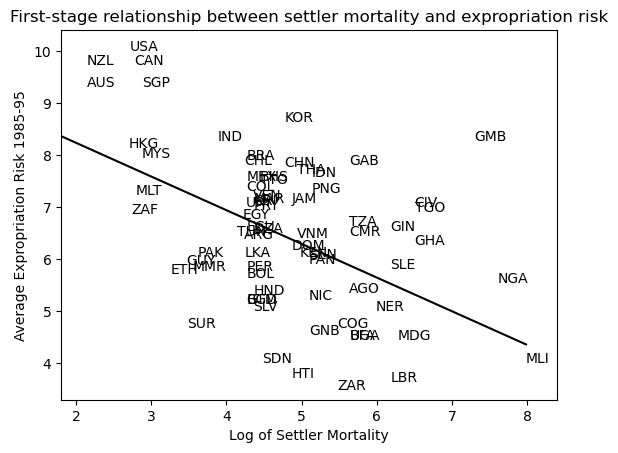

In [58]:
# Dropping NA's is required to use numpy's polyfit
df1_subset2 = df1.dropna(subset=['logem4', 'avexpr'])

X = df1_subset2['logem4']
y = df1_subset2['avexpr']
labels = df1_subset2['shortnam']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)), color='black')

ax.set_xlim([1.8,8.4])
ax.set_ylim([3.3,10.4])
ax.set_xlabel('Log of Settler Mortality')
ax.set_ylabel('Average Expropriation Risk 1985-95')
ax.set_title('First-stage relationship between settler mortality and expropriation risk')
plt.show()

The second condition may not be satisfied if settler mortality rates in the 17th to 19th centuries have a direct effect on current GDP (in addition to their indirect effect through institutions).

For example, settler mortality rates may be related to the current disease environment in a country, which could affect current economic performance.

(Acemoglu et al., 2001) argue this is unlikely because:

- The majority of settler deaths were due to malaria and yellow fever and had a limited effect on local people.
- The disease burden on local people in Africa or India, for example, did not appear to be higher than average, supported by relatively high population densities in these areas before colonization.

As we appear to have a valid instrument, we can use 2SLS regression to obtain consistent and unbiased parameter estimates.

### **4.1. The First Stage**

The first stage involves regressing the endogenous variable ($avexpr_i$) on the instrument.

The instrument is the set of all exogenous variables in our model (and not just the variable we have replaced).

Using model 1 as an example, our instrument is simply a constant and settler mortality rates $logem4_i$.

Therefore, we will estimate the first-stage regression as

$$avexpri_i = \delta_0 + \delta_1 logem4_i + v_i$$

The data we need to estimate this equation is located in `maketable4.dta` (only complete data, indicated by baseco = 1, is used for estimation).

In [59]:
# Import and select the data
df4 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable4.dta?raw=true')
df4 = df4[df4['baseco'] == 1]

# Add a constant variable
df4['const'] = 1

# Fit the first stage regression and print summary
results_fs = sm.OLS(df4['avexpr'], df4[['const', 'logem4']], missing='drop').fit()

print(results_fs.summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.95
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.08e-05
Time:                        19:57:16   Log-Likelihood:                -104.83
No. Observations:                  64   AIC:                             213.7
Df Residuals:                      62   BIC:                             218.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3414      0.611     15.296      0.0

### **4.2. The Second Stage**

We need to retrieve the predicted values of $avexpr_i$ using `.predict()`.

We then replace the endogenous variable $avexpr_i$ with the predicted values $\widehat{avexpr}_i$ in the original linear model.

Our second stage regression is thus

$$logpgp95_i = \beta_0 + \beta_1 \widehat{avexpr}_i + u_i$$

In [60]:
df4['predicted_avexpr'] = results_fs.predict()

results_ss = sm.OLS(df4['logpgp95'], df4[['const', 'predicted_avexpr']]).fit()

print(results_ss.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     56.60
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           2.66e-10
Time:                        19:59:27   Log-Likelihood:                -72.268
No. Observations:                  64   AIC:                             148.5
Df Residuals:                      62   BIC:                             152.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9097      0.823  

The second-stage regression results give us an unbiased and consistent estimate of the effect of institutions on economic outcomes.

The result suggests a stronger positive relationship than what the OLS results indicated.

Note that while our parameter estimates are correct, our standard errors are not and for this reason, computing 2SLS ‘manually’ (in stages with OLS) is not recommended.

We can correctly estimate a 2SLS regression in one step using the `linearmodels` package, an extension of `statsmodels`.

Note that when using `IV2SLS`, the exogenous and instrument variables are split up in the function arguments (whereas before the instrument included exogenous variables)

In [62]:
iv = IV2SLS(dependent=df4['logpgp95'], exog=df4['const'], endog=df4['avexpr'], instruments=df4['logem4']).fit(cov_type='unadjusted')

print(iv.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               logpgp95   R-squared:                      0.1870
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1739
No. Observations:                  64   F-statistic:                    37.568
Date:                Sun, Apr 28 2024   P-value (F-stat)                0.0000
Time:                        20:01:06   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.9097     1.0106     1.8897     0.0588     -0.0710      3.8903
avexpr         0.9443     0.1541     6.1293     0.00

Given that we now have consistent and unbiased estimates, we can infer from the model we have estimated that institutional differences (stemming from institutions set up during colonization) can help to explain differences in income levels across countries today.

(Acemoglu et al., 2001) use a marginal effect of 0.94 to calculate that the difference in the index between Chile and Nigeria (ie. institutional quality) implies up to a 7-fold difference in income, emphasizing the significance of institutions in economic development.

## **5. More on Linearity and Transformations**

In discussing the decision to set $\mathcal{H} = \mathcal{H}_l$, we mentioned we can use many of the same ideas when extending to $\mathcal{H}$ to a broader class of functions.

First transform the data using some arbitrary function $\phi : \mathbb{R}^k \rightarrow \mathbb{R}^J$.

The action of $\phi$ on $X \in \mathbb{R}^k$ will be

$$X \mapsto \phi(X) = \begin{pmatrix} \phi_1(X) \\ \phi_2(X) \\ \vdots \\ \phi_J(X) \end{pmatrix} \in \mathbb{R}^J$$

The individual functions $\phi_1$, $\cdots$, $\phi_J$ mapping $\mathbb{R}^k$ into $\mathbb{R}$ are sometimes called **basis functions**.

In machine learning texts, the range of $\phi$ is called the **feature space**.

We solve the empirical risk minimization problem when the hypothesis space is

$$\mathcal{H}_{\phi} := \{ \text{all functions } l \circ \phi, \text{ where } l \text{ is a linear function from  } \mathbb{R}^J \text{ to } \mathbb{R}\}$$

The empirical risk minimization problem is then

$$\min_{l} \sum^{N}_{n=1} [y_n - l(\phi(X_n))]^2 = \min_{l} \sum^{N}_{n=1} (y_n - \gamma^{T}\phi(X_n))^2 \tag{5}$$

Switiching to matrix notation, if

$$ \Phi := \begin{pmatrix}
\phi_1(X_1) & \cdots & \phi_J(X_1) \\
\phi_1(X_2) & \cdots & \phi_J(X_2) \\
\vdots & \ddots & \vdots \\
\phi_1(X_N) & \cdots & \phi_J(X_N) \\
\end{pmatrix} \in \mathbb{R}^{N \times J} \tag{6}$$

Then the objective in (5) can be expressed as $||y - \Phi \gamma||^2$.

Assuming that $\Phi$ is full column rank, the solution is

$$\hat{\gamma} := (\Phi^{T}\Phi)^{-1}(\Phi^{T}y)$$

**[Example 1]** Adding an intercept to a regression can be regarded as a transformation of the data.

Indeed adding an intercept is equivalent to applying the transformation

$$\phi(X) = \begin{pmatrix} 1 \\ X \end{pmatrix} = \begin{pmatrix} 1 \\ x_1 \\ \vdots \\ x_k \end{pmatrix}$$

In practice, adding an intercept means fitting an extra parameter, and this extra degree of freedom allows a more flexible fit in our regression.

**[Example 2]** Let $K = 1$, so that X_n \in \mathbb{R}.

Consider the mononomial basic functions \phi_j(x) := x^{j-1}, so that

$$\gamma^{T} \phi(X_n) = \gamma^{T} \begin{pmatrix} X_n^0 \\ X_n^1 \\ \vdots \\ X_n^{J-1} \end{pmatrix} = \sum\limits^{J}_{j=1} \gamma_j X_n^{j-1} \tag{7}$$

The mononomial basis transformation applied to scalar X corresponds to univariate polynomial regression.

Under this transformation, the matrix $\Phi$ in (6) is called the **Vandermonde matrix**.

Weierstrass approximation theorem tells us that polynomials of sufficiently high order can effectively approximate any one-dimensional continuous nonlinear relationship.

**[Example 3]** A common alternative is to use orthogonal polynomials such as *Chebychev polynomials* or *Hermite polynomials*.

Other alternatives include wavelets and splines.

In econometrics, this procedure is often referred to as **nonparametric series regression**.

A key topic is the optimal number of basis functions.

In this figure, it is clear that no linear function mapping $x$ to $y$ can produce small approximation error.

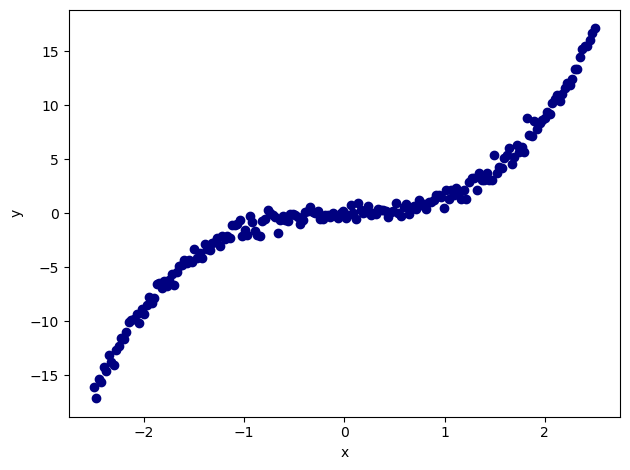

In [50]:
N = 200
alpha = 0.4
xmin = -2.5
xmax = 2.5

xgrid = np.linspace(xmin, xmax, N)
U = np.random.randn(N) * 0.5

def f(x):
    return alpha * x + x**3 

Y = f(xgrid) + U

fig, ax = plt.subplots()
ax.scatter(xgrid, Y, color='navy')

ax.set_xlabel('x')
ax.set_ylabel('y')

fig.tight_layout()

Figure on following slide shows data after applying the transformation $\mathbb{R} \ni x \mapsto \phi(x) := (x, x^3)^{T} \in \mathbb{R}^2$.

The plane drawn in the figure represents a linear function $l : \mathbb{R}^2 \rightarrow \mathbb{R}$.

The composition $l \circ \phi$ has low approximation error.

The two figures illustrate how nonlinear data can become linear when projected into higher dimensions.

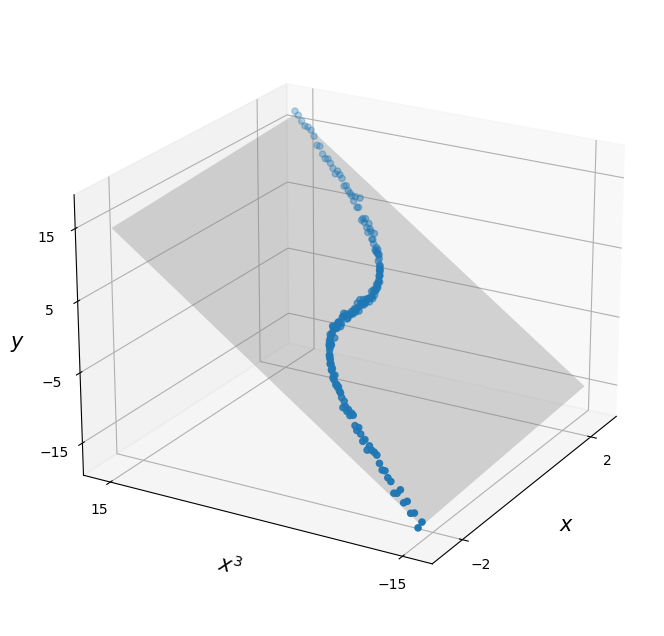

In [51]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xgrid, xgrid**3, Y) 

ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$x^3$', fontsize=15)
ax.set_zlabel(r'$y$', fontsize=15)

ax.set_xticks((-2,  2))
ax.set_yticks((-15, 15))
ax.set_zticks((-15, -5, 5, 15))


xg = np.linspace(xmin, xmax, 2)
x2, y2 = np.meshgrid(xg, xg**3)
z2 = alpha * x2 + y2
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, color='gray',
        linewidth=1, antialiased=True, alpha=0.3)
ax.view_init(elev=22.0, azim=-150)

plt.show()

## **6. Assignment**

### **6.1. OLS**

The OLS parameter $\beta$ can also be estimated using matrix algebra and `numpy`.

The linear equation we want to estimate is (written in matrix form)

$$y = X\beta + u$$

To solve for the unknown parameter $\beta$, we want to minimize the sum of squared residuals

$$\min_{\hat{\beta}} \hat{u}^{T}\hat{u}$$

Rearranging the first equation and substituting into the second equation, we can write

$$\min_{\hat{\beta}} (y - X\hat{\beta})^{T}(y - X\hat{\beta})$$

Solving this optimization problem gives the solution for the $\hat{\beta}$ coefficients

$$\hat{\beta} = (X^{T}X)^{-1} (X^{T}y)$$

Using the above information, compute $\hat{\beta}$ from model 1 using `numpy` - your results should be the same as those in the `statsmodels` output from earlier in the lecture.

In [ ]:
# Load in data
df = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable1.dta?raw=true')
df = df.dropna(subset=['logpgp95', 'avexpr'])

# Add a constant term
df['const'] = 1

# Define the X and y variables
y = np.asarray(df1['logpgp95'])
X = np.asarray(df1[['const', 'avexpr']])

# Compute β_hat : Your code here!
# beta_hat = 

# Print out the results from the 2 x 1 vector β_hat
print(f'β_0 = {beta_hat[0]:.2}')
print(f'β_1 = {beta_hat[1]:.2}')

### **6.2. Hausman Test**

In this note, we think the original model suffers from endogeneity bias due to the likely effect income has on institutional development.

Although endogeneity is often best identified by thinking about the data and model, we can formally test for endogeneity using the **Hausman test**.

We want to test for correlation between the endogenous variable, $avespr_i$, and the errors, $u_i$.

$$\begin{matrix} 
&H_0 : Cov(avexpr_i, u_i) = 0& \quad(\text{no endogeneity}) \\ 
&H_1 : Cov(avexpr_i, u_i) \neq 0& \quad (\text{endogeneity})
\end{matrix}$$

This test is running in two stages.

First, we regress $avexpr_i$ on the instrument, $logem4_i$

$$avexpr_i = \pi_0 + \pi_1 logem4_i + v_i$$

Second, we retrieve the residuals $\hat{v}_i$ and include them in the original equation

$$logpgp95_i = \beta_0 + \beta_1 avexpr_i + \alpha \hat{v}_i + u_i$$

If $\alpha$ is statistically significant (with a p-value < 0.05), then we reject the null hypothesis and conclude that $avexpr_i$ is endogenous.

Using the above information, estimate a Hausman test and interpret your results.

In [ ]:
# Load in data
df = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable4.dta?raw=true')

# Your code here!